In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
#Loading the dataset

In [14]:
data = pd.read_csv(r'E:\Downloads\car_age_price.csv')

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.shape

(112, 2)

In [12]:
X = data['Year'].values.reshape(-1, 1)
y = data['Price'].values

In [15]:
#split the dataset

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [17]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [18]:
#linear regression model

In [19]:
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [20]:
print("Linear Regression:")
print("Mean Squared Error:", mse_linear)
print("R-squared:", r2_linear)

Linear Regression:
Mean Squared Error: 4326906256.829671
R-squared: 0.36759313425902185


# Lasso Regression

In [21]:
lasso_reg = Lasso(alpha=0.1)  
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [22]:
#lasso regression model

In [23]:
y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [24]:
print("\nLasso Regression:")
print("Mean Squared Error:", mse_lasso)
print("R-squared:", r2_lasso)


Lasso Regression:
Mean Squared Error: 4326901608.19506
R-squared: 0.36759381368868127


In [25]:
#Comparing the two models

In [26]:
if mse_linear < mse_lasso:
    print("\nLinear regression performs better.")
else:
    print("\nLasso regression performs better.")


Lasso regression performs better.


# Predictions for 2022 model

In [27]:
year_2022 = np.array([[2022]])  # Adjust the year accordingly
predicted_price_linear = linear_reg.predict(year_2022)
predicted_price_lasso = lasso_reg.predict(year_2022)

print("\nPredicted price of a 2022 model (Linear Regression):", predicted_price_linear)
print("Predicted price of a 2022 model (Lasso Regression):", predicted_price_lasso)


Predicted price of a 2022 model (Linear Regression): [743601.61594504]
Predicted price of a 2022 model (Lasso Regression): [743601.39177768]


In [28]:
#Visualising linear regression model

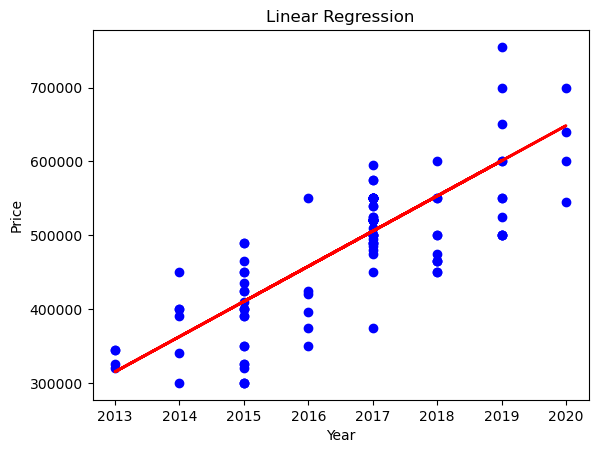

In [29]:
plt.scatter(X, y, color='blue')
plt.plot(X_test, y_pred_linear, color='red', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.show()